In [1]:
# import the libraries
import pandas as pd 
import numpy as np 

In [2]:
# load the dataset
dataset = pd.read_csv("200458M.csv")
dataset.head()

,Patient_ID,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6.0,148.0,72.0,35.0,32.0,33.6,0.627,50.0,1
1,2,1.0,85.0,66.0,29.0,32.0,26.6,0.351,31.0,0
2,3,8.0,183.0,64.0,23.0,32.0,23.3,0.672,32.0,1
3,4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,5,3.0,137.0,40.0,35.0,168.0,32.0,2.288,33.0,1


In [3]:
# specify the list of columns to get the five number summary for
five_no_cols = ["Insulin", "BMI", "Age"]

# get the five number summary
five_no_summary = dataset[five_no_cols].describe().round(3)
print(five_no_summary)

       Insulin      BMI      Age
count  768.000  768.000  768.000
mean    82.301   30.840   33.221
std     74.985    4.798   11.756
min     32.000   18.200   21.000
25%     32.000   27.575   24.000
50%     32.000   32.000   29.000
75%    115.250   34.100   41.000
max    392.000   39.900   81.000


Text(0.5, 1.0, 'Bar Chart of Diabetes Outcome Variable')

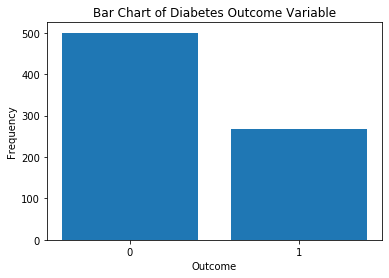

In [4]:
# bar chart for 'Outcome' variable
import matplotlib.pyplot as plt 
%matplotlib inline
target_var = "Outcome"

# count the no of occurances for each category of the target variable
target_count = dataset[target_var].value_counts()

# create a bar chart
plt.bar(['0','1'], target_count.values)

# add labels to the x-axis, y-axis, & title of the chart
plt.xlabel(target_var)
plt.ylabel('Frequency')
plt.title('Bar Chart of Diabetes Outcome Variable')

# Show the chart
#plt.show()

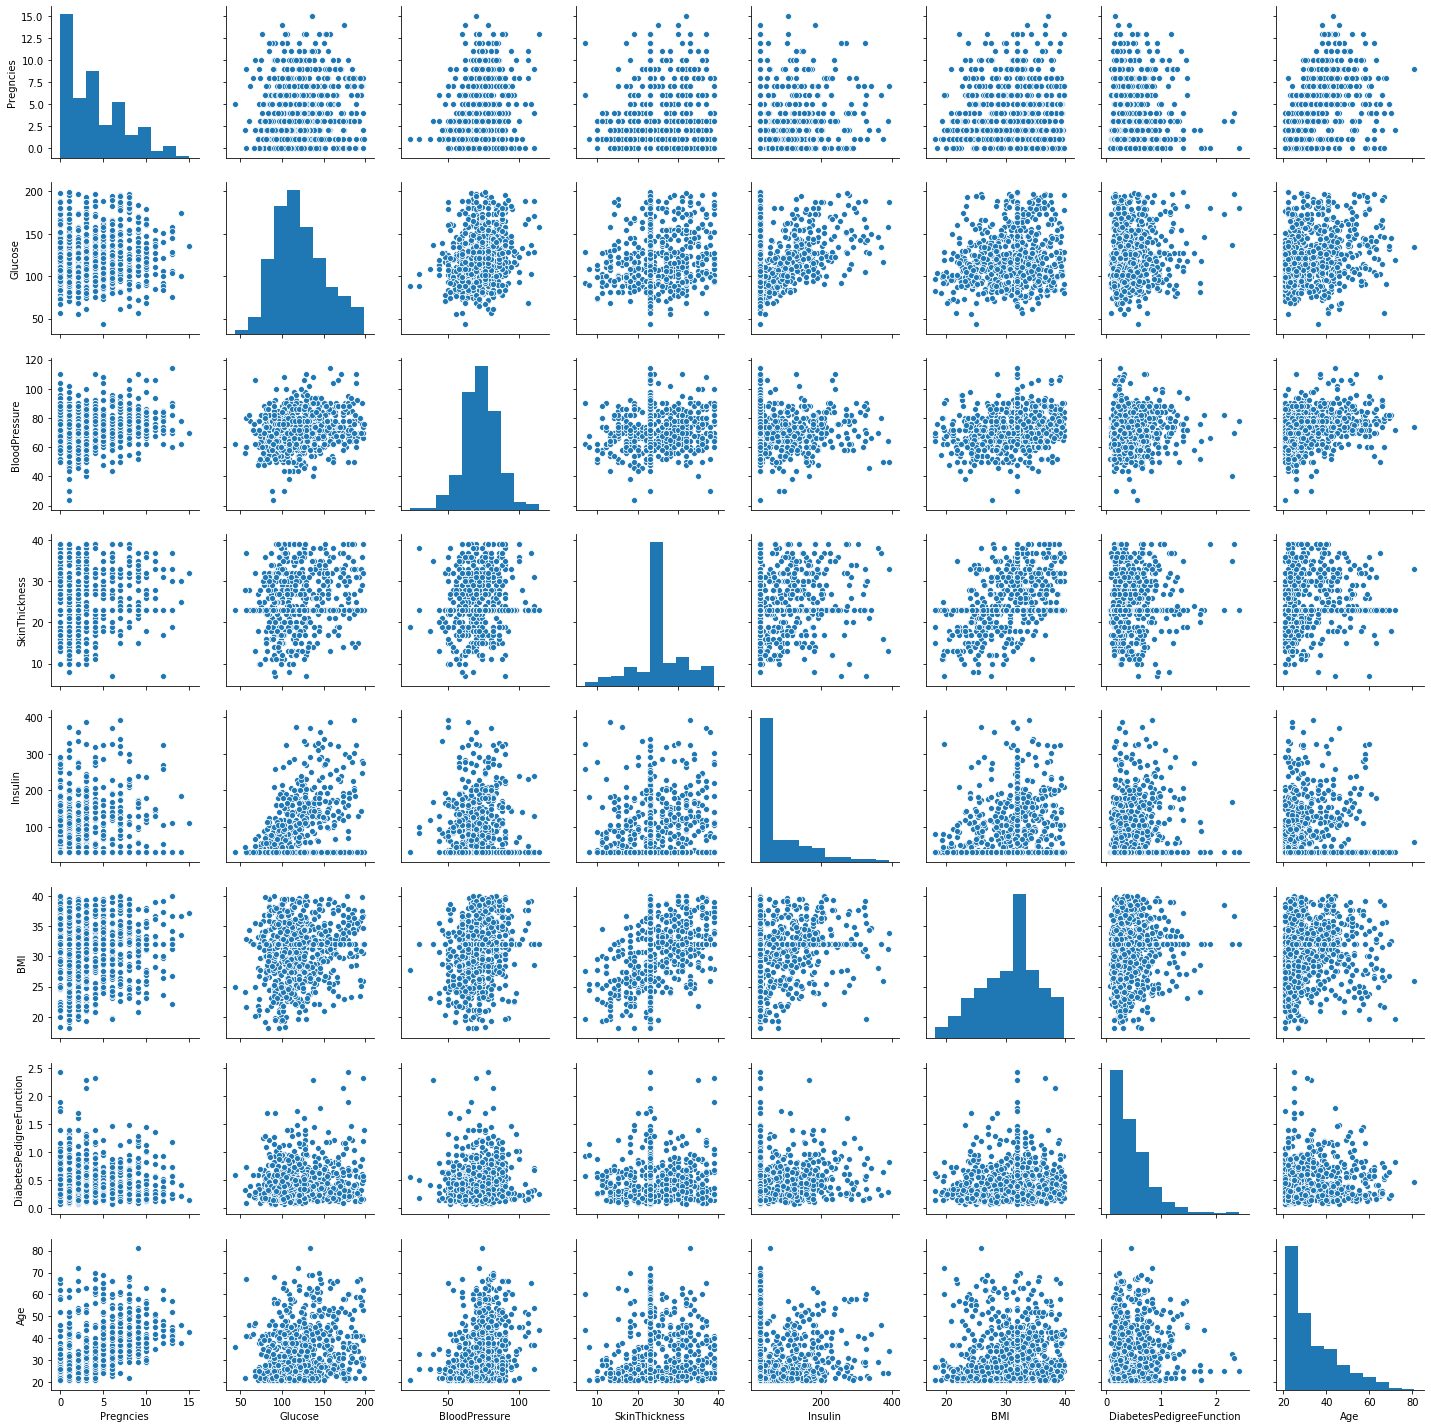

In [5]:
# a pairwise relationship scatterplot for predictor variables (8x8 subplots) using Seaborn Python library
import seaborn as sns

# create a pair plot
sns.pairplot(dataset.drop(["Patient_ID","Outcome"], axis=1))

In [6]:
# Calculate the covariance between each predictor variable and the target variable
dataset = dataset.drop("Patient_ID", axis=1)
cov_matrix = dataset.cov()

In [7]:
cov_matrix

,Pregncies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregncies,11.101199,12.487753,8.751375,2.152906,-12.955274,1.651335,-0.041063,21.137759,0.343886
Glucose,12.487753,919.778885,84.675323,27.064627,553.938687,27.205080,1.356842,96.330186,7.177036
BloodPressure,8.751375,84.675323,142.419191,7.959394,-38.103625,12.750894,-0.002706,45.907258,0.986168
SkinThickness,2.152906,27.064627,7.959394,37.425601,59.582602,11.863991,0.089191,5.332529,0.484280
Insulin,-12.955274,553.938687,-38.103625,59.582602,5622.818148,58.347374,3.631814,-39.353498,4.106116
BMI,1.651335,27.205080,12.750894,11.863991,58.347374,23.018468,0.114720,4.574423,0.618582
DiabetesPedigreeFunction,-0.041063,1.356842,-0.002706,0.089191,3.631814,0.114720,0.109639,0.140910,0.027738
Age,21.137759,96.330186,45.907258,5.332529,-39.353498,4.574423,0.140910,138.193442,1.337258
Outcome,0.343886,7.177036,0.986168,0.484280,4.106116,0.618582,0.027738,1.337258,0.227483


In [8]:
# get the covariance values for the target variable
cov_with_Outcome = cov_matrix["Outcome"]
print(cov_with_Outcome)

Pregncies                   0.343886
Glucose                     7.177036
BloodPressure               0.986168
SkinThickness               0.484280
Insulin                     4.106116
BMI                         0.618582
DiabetesPedigreeFunction    0.027738
Age                         1.337258
Outcome                     0.227483
Name: Outcome, dtype: float64


In [9]:
# Name two most influential factors (variables) that increase the risk of diabetics. Justify your answer.
# Calculate the correlation between each predictor variable and the target variable
correlations = dataset.corr()['Outcome']
correlations

Pregncies                   0.216399
Glucose                     0.496169
BloodPressure               0.173258
SkinThickness               0.165973
Insulin                     0.114810
BMI                         0.270324
DiabetesPedigreeFunction    0.175637
Age                         0.238505
Outcome                     1.000000
Name: Outcome, dtype: float64

In [10]:
# select the 2 variables with the highest correlation coefficient
corr_matrix = dataset.corr()
print("Two most influential factors")
print(corr_matrix.nlargest(3,'Outcome')['Outcome'].index[1:])

Two most influential factors
Index(['Glucose', 'BMI'], dtype='object')



Glucose and BMI are the features that are highly correlated with the target variable (Outcome) which have the highest correlation values. The Glucose variable quantifies the patient's blood glucose level, a crucial sign of diabetes. An indication of insulin resistance, a prevalent aspect of type 2 diabetes, is a higher blood glucose level. Therefore, diabetes is more prone to occur in persons with high glucose levels. The BMI variable calculates the patient's body mass index, which is a measure of their level of body fat. The patient is overweight or obese, which is a risk factor for type 2 diabetes, according to a higher BMI. Insulin resistance brought on by too much body fat can raise the chance of developing diabetes. Therefore, based on the correlation coefficient values and the known factors, Glucose and BMI are the two most influential factors that increase the risk of diabetics.